In [2]:
from pymongo import MongoClient
client = MongoClient()
# Access/Initiate Database
db = client['ufc_database']
# Access/Initiate Table
tab = db['test_table']
tabUFC = db['test_UFC_table']

In [2]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [3]:
tab.insert_one({'test': 'yes'})

In [3]:
import requests
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error

## Main page

In [5]:
# https://www.sherdog.com/organizations/Ultimate-Fighting-Championship-UFC-2/recent-events/1
# https://www.sherdog.com/events/UFC-234-Adesanya-vs-Silva-72011
for x in range(1,5):
    av = 'http://ufcstats.com/statistics/events/completed'
    path = '?page={}'.format(x)
    url = av+path
    req = requests.get(url)
    print('Retrieving', url)

#with open(data) as f:
#    html_str = f.read()

Retrieving http://ufcstats.com/statistics/events/completed?page=1
Retrieving http://ufcstats.com/statistics/events/completed?page=2
Retrieving http://ufcstats.com/statistics/events/completed?page=3
Retrieving http://ufcstats.com/statistics/events/completed?page=4


In [6]:
soup = BeautifulSoup(req.text, 'html.parser')

In [7]:
soup.head()

[<meta charset="utf-8"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <title>
     Stats | UFC
   </title>,
 <meta content="" name="description"/>,
 <meta content="" name="viewport"/>,
 <link href="/blocks/main.css?ver=833813" rel="stylesheet"/>,
 <script src="/js/vendor/modernizr-2.6.2.min.js"></script>,
 <script>
     (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
     (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
     m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
     })(window,document,'script','//www.google-analytics.com/analytics.js','ga');
 
     ga('create', 'UA-2855164-1', 'auto');
     ga('send', 'pageview');
   </script>]

In [11]:
tag = soup.find_all('a', class_="b-link b-link_style_black") 
tag[:3]

[<a class="b-link b-link_style_black" href="http://ufcstats.com/event-details/47b7e4e60813b7b2">
                           UFC Fight Night: Belfort vs. Gastelum
                         </a>,
 <a class="b-link b-link_style_black" href="http://ufcstats.com/event-details/20e403a1acfef130">
                           UFC 209: Woodley vs. Thompson 2
                         </a>,
 <a class="b-link b-link_style_black" href="http://ufcstats.com/event-details/b4ad3a06ee4d660c">
                           UFC Fight Night: Lewis vs. Browne
                         </a>]

In [125]:
len(tag)

24

In [137]:
tag1 =tag[0]
tag1

<a class="b-link b-link_style_black" href="http://ufcstats.com/event-details/b5882371e2a3900d">
                          UFC 234: Adesanya vs. Silva
                        </a>

In [144]:
2*0.5

1.0

In [151]:
tag1['href']

'http://ufcstats.com/event-details/b5882371e2a3900d'

In [12]:
for x in tag[:4]:
    print(x['href'])
    print(x.text.strip())
#     for y in tag2:
#     if y.text.strip() in lst:
#         continue
#     else:
#         print(y['href'])
#         print(y.text.strip())
#         lst.add(y.text.strip())
# lst

http://ufcstats.com/event-details/47b7e4e60813b7b2
UFC Fight Night: Belfort vs. Gastelum
http://ufcstats.com/event-details/20e403a1acfef130
UFC 209: Woodley vs. Thompson 2
http://ufcstats.com/event-details/b4ad3a06ee4d660c
UFC Fight Night: Lewis vs. Browne
http://ufcstats.com/event-details/865aa315ea62c511
UFC 208: Holm vs. De Randamie


## Second Page

In [13]:
av2 = 'http://ufcstats.com/event-details/84283233ec42be5f'
url2 = av2
req2 = requests.get(url2)
print('Retrieving', url2)

Retrieving http://ufcstats.com/event-details/84283233ec42be5f


In [14]:
soup2 = BeautifulSoup(req2.text, 'html.parser')

In [16]:
tag2 = soup2.find_all('a', class_="b-link b-link_style_black") 
tag2[0]

<a class="b-link b-link_style_black" href="http://ufcstats.com/fighter-details/fea79f9bc8c68769">
              Marlon Moraes
            </a>

In [17]:
tag3 =tag2[0]
tag3.text.strip()

'Marlon Moraes'

In [18]:
tag3['href']

'http://ufcstats.com/fighter-details/fea79f9bc8c68769'

In [19]:
len(tag2)

26

In [21]:
lst = set(['Lando Vannata'])
for y in tag2[:5]:
    if y.text.strip() in lst:
        continue
    else:
        print(y['href'])
        print(y.text.strip())
        lst.add(y.text.strip())
lst

    

http://ufcstats.com/fighter-details/fea79f9bc8c68769
Marlon Moraes
http://ufcstats.com/fighter-details/2f13e4020cea5b38
Raphael Assuncao
http://ufcstats.com/fighter-details/d0f3959b4a9747e6
Jose Aldo
http://ufcstats.com/fighter-details/b6452706b373eea1
Renato Moicano
http://ufcstats.com/fighter-details/427b5953ac8e3a27
Demian Maia


{'Demian Maia',
 'Jose Aldo',
 'Lando Vannata',
 'Marlon Moraes',
 'Raphael Assuncao',
 'Renato Moicano'}

In [22]:
nll = list(lst)

In [23]:
nll

['Demian Maia',
 'Raphael Assuncao',
 'Jose Aldo',
 'Marlon Moraes',
 'Lando Vannata',
 'Renato Moicano']

In [24]:
tab.insert_one({'fighter_lst': nll})

# This is the workflow for getting the list of fighters and use it to start scrapping wikipedia.

In [25]:
tab

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ufc_database'), 'test_table')

In [26]:
test = tab.find({'fighter_lst': nll}).next()

In [27]:
fighters_lst = test['fighter_lst']

In [28]:
fighters_lst[:5]

['Demian Maia',
 'Raphael Assuncao',
 'Jose Aldo',
 'Marlon Moraes',
 'Lando Vannata']

In [243]:
type(fighters_lst)

list

In [29]:
for x in fighters_lst[:5]:
    print(x)

Demian Maia
Raphael Assuncao
Jose Aldo
Marlon Moraes
Lando Vannata


In [30]:
import requests
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
from pymongo import MongoClient
client = MongoClient()
# Access/Initiate Database
db = client['ufc_database']
# Access/Initiate Table
tab = db['events']


In [31]:
type(tab)

pymongo.collection.Collection

In [32]:
test = tab.find({}, {'raw_event': True, '_id': False})

In [33]:
type(test)

pymongo.cursor.Cursor

In [107]:
re = test[442]['raw_event']

In [108]:
soup = BeautifulSoup(re, 'html.parser')


# For Event Info

In [109]:
# This is for the event name
soup.find('span', class_= 'b-content__title-highlight').text.split('\n')[1].strip()

'UFC 20: Battle for the Gold'

In [110]:
#this is for the date of the event
t = soup.find_all('li', class_="b-list__box-list-item")[0].text.split('\n')[4].strip()
t

'May 07, 1999'

In [111]:
from dateutil.parser import parse
dt = parse('February 09, 2019')
print(dt)
# datetime.datetime(2010, 2, 15, 0, 0)
print(dt.strftime('%d/%m/%Y'))
# 15/02/2010

2019-02-09 00:00:00
09/02/2019


In [112]:
# this is for the location of the event
soup.find_all('li', class_="b-list__box-list-item")[1].text.split('\n')[5].strip()

'Birmingham, Alabama, USA'

In [113]:
# this is for the attendance of the event
soup.find_all('li', class_="b-list__box-list-item")[2].text.split('\n')[4].strip()

''

In [114]:
# this is for the attendance of the event
soup.find_all('li', class_="b-list__box-list-item")[2].text

'\n\n        Attendance:\n      \n'

# For Event Fights

In [370]:
soup.find()

<html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
    Stats | UFC
  </title>
<meta content="" name="description"/>
<meta content="" name="viewport"/>
<link href="/blocks/main.css?ver=592094" rel="stylesheet"/>
<script src="/js/vendor/modernizr-2.6.2.min.js"></script>
<script>
    (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
    m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
    })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

    ga('create', 'UA-2855164-1', 'auto');
    ga('send', 'pageview');
  </script>
</head>
<body class="b-page" data-link="home">
<header class="b-head">
<div class="b-head__nav-bar">
<div class="l-page__container">
<a class="b-head__logo" href="/">
<img alt="" src="http://1e49bc5171d173577ecd-1323f4090557a33db

In [412]:
# this is for name of the winner fighter
soup.find_all('td', class_="b-fight-details__table-col l-page_align_left")[0].text.split('\n')[3].strip()

'Israel Adesanya'

In [406]:
# this is for name of the loser fighter
soup.find_all('td', class_="b-fight-details__table-col l-page_align_left")[0].text.split('\n')[8].strip()

'Anderson Silva'

In [414]:
soup.find_all('td', class_="b-fight-details__table-col l-page_align_left")[1].text.strip('\n').strip()

'Middleweight'

In [417]:
soup.find_all('td', class_="b-fight-details__table-col l-page_align_left")[1].img['src']

'http://1e49bc5171d173577ecd-1323f4090557a33db01577564f60846c.r80.cf1.rackcdn.com/fight.png'

In [420]:
# this will check for bonuses
if soup.find_all('td', class_="b-fight-details__table-col l-page_align_left")[1].img['src']\
== 'http://1e49bc5171d173577ecd-1323f4090557a33db01577564f60846c.r80.cf1.rackcdn.com/fight.png':
    print('fight')

fight


In [421]:
"http://1e49bc5171d173577ecd-1323f4090557a33db01577564f60846c.r80.cf1.rackcdn.com/perf.png" 
"http://1e49bc5171d173577ecd-1323f4090557a33db01577564f60846c.r80.cf1.rackcdn.com/sub.png"
"http://1e49bc5171d173577ecd-1323f4090557a33db01577564f60846c.r80.cf1.rackcdn.com/ko.png"
"http://1e49bc5171d173577ecd-1323f4090557a33db01577564f60846c.r80.cf1.rackcdn.com/belt.png"

'http://1e49bc5171d173577ecd-1323f4090557a33db01577564f60846c.r80.cf1.rackcdn.com/belt.png'

In [418]:
soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js ie8 lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
    Stats | UFC
  </title>
<meta content="" name="description"/>
<meta content="" name="viewport"/>
<link href="/blocks/main.css?ver=592094" rel="stylesheet"/>
<script src="/js/vendor/modernizr-2.6.2.min.js"></script>
<script>
    (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
    m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
    })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

    ga('create', 'UA-2855164-1', 'auto');
    ga('send

In [275]:
for x in range(3):
    print(test[x].)
    soup = BeautifulSoup(req.text, 'html.parser')
    tag = soup.find_all('a', class_="b-link b-link_style_black") 

{'_id': ObjectId('5c633f8e42e7c02b80f993c5'), 'event_name': 'UFC 234: Adesanya vs. Silva', 'raw_event': '<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js ie8 lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\n<head>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <title>\n    Stats | UFC\n  </title>\n  <meta name="description" content="">\n  <meta name="viewport" content="">\n  <link rel="stylesheet" href="/blocks/main.css?ver=592094">\n  <script src="/js/vendor/modernizr-2.6.2.min.js"></script>\n  <script>\n    (function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\n    m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n

# new idea (from mongo to pandas)

In [480]:
from dateutil.parser import parse
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
from pymongo import MongoClient
client = MongoClient()
# Access/Initiate Database
db = client['ufc_database']
# Access/Initiate Table
tab = db['events']
tab.find()

In [383]:
tab.count()

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


466

In [908]:
test = tab.find({}, {'raw_event': True, '_id': False})
e_name=[]
date = []
loc = []
att = []
for x in range(0,tab.count()):
    re = test[x]['raw_event']
    soup = BeautifulSoup(re, 'html.parser')
    # This is for the event name
    e_name.append(soup.find('span', class_= 'b-content__title-highlight').text.split('\n')[1].strip())
    #this is for the date of the event
    dt = parse(soup.find_all('li', class_="b-list__box-list-item")[0].text.split('\n')[4].strip())
    date.append(dt.strftime('%m/%d/%Y'))
    # this is for the location of the event
    loc.append(soup.find_all('li', class_="b-list__box-list-item")[1].text.split('\n')[5].strip())
    # this is for the attendance of the event
    att.append(soup.find_all('li', class_="b-list__box-list-item")[2].text.split('\n')[4].strip())

    
att[:5]

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


['15,238', '10,040', '12,152', '15,862', '9,010']

In [485]:
df = pd.DataFrame({'Event Name' :e_name, 'Date':date, 'Location':loc, 'Attendance':att})

In [486]:
df.head(5)

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia","15,238"
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil","10,040"
2,UFC Fight Night: Cejudo vs. Dillashaw,01/19/2019,"Brooklyn, New York, USA","12,152"
3,UFC 232: Jones vs. Gustafsson 2,12/29/2018,"Los Angeles, California, USA","15,862"
4,UFC Fight Night: Lee vs. Iaquinta,12/15/2018,"Milwaukee, Wisconsin, USA","9,010"


In [384]:
test = tab.find({}, {'raw_event': True, '_id': False})
e_name =[]
wf = []
lf = []
wc = []
bonus = []
champ = []
for x in range(0,tab.count()):
    re = test[x]['raw_event']
    soup = BeautifulSoup(re, 'html.parser')
    # This is for the event name
    #this is for the date of the event
    
    sub_list = soup.find_all('td', class_="b-fight-details__table-col l-page_align_left")
    for obj in sub_list:
        
        for i,k in enumerate(obj.find_all('a')):
            
            if i == 0:
                wf.append(k.text.strip())
                e_name.append(soup.find('span', class_= 'b-content__title-highlight').text.split('\n')[1].strip())
            elif i == 1:
                lf.append(k.text.strip())
    
    sub_wc = list(soup.find_all('td', class_="b-fight-details__table-col l-page_align_left"))
    for i,v in enumerate(sub_wc):
        if v.br == None:
            continue
        else:
            wc.append(v.text.strip())

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


In [385]:
df2 = pd.DataFrame({'Event Name': e_name,'Winner':wf, 'Loser':lf, 'Weight Class': wc})

In [387]:
df2.head(5)

,Event Name,Winner,Loser,Weight Class
0,UFC 234: Adesanya vs. Silva,Israel Adesanya,Anderson Silva,Middleweight
1,UFC 234: Adesanya vs. Silva,Lando Vannata,Marcos Mariano,Lightweight
2,UFC 234: Adesanya vs. Silva,Ricky Simon,Rani Yahya,Bantamweight
3,UFC 234: Adesanya vs. Silva,Montana De La Rosa,Nadia Kassem,Women's Flyweight
4,UFC 234: Adesanya vs. Silva,Jimmy Crute,Sam Alvey,Light Heavyweight


# Test for building fighters tables

In [551]:
tab2 = db['fighters']
tab2.find()

In [552]:
test = tab2.find({}, {'raw_fighter': True, '_id': False})

In [553]:
test

In [415]:

for x in range(0,tab2.count()):
    re2 = test[x]['raw_fighter']
    soup2 = BeautifulSoup(re2, 'html.parser')

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


KeyError: 'raw_fighter'

In [743]:
re2 = test[0]['raw_fighter']
soup2 = BeautifulSoup(re2, 'html.parser')
soup2 = list(soup2)[10]

In [748]:
soup2

<html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
    Stats | UFC
  </title>
<meta content="" name="description"/>
<meta content="" name="viewport"/>
<link href="/blocks/main.css?ver=967141" rel="stylesheet"/>
<script src="/js/vendor/modernizr-2.6.2.min.js"></script>
<script>
    (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
    m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
    })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

    ga('create', 'UA-2855164-1', 'auto');
    ga('send', 'pageview');
  </script>
</head>
<body class="b-page" data-link="home">
<header class="b-head">
<div class="b-head__nav-bar">
<div class="l-page__container">
<a class="b-head__logo" href="/">
<img alt="" src="http://1e49bc5171d173577ecd-1323f4090557a33db

In [747]:
# this is for name of fighter
soup2.find_all('span', class_="b-content__title-highlight")[0].text.strip()

'Israel Adesanya'

In [432]:
# this is fighters nickname
soup2.find_all('p', class_="b-content__Nickname")[0].text.strip()

'The Last Stylebender'

In [437]:
#this is the fighter record
soup2.find_all('span', class_="b-content__title-record")[0].text.strip().split()[1]

'16-0-0'

In [587]:
# this is the fighter height
feet = soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[0].text.strip().split()[1].strip("'")
inch =soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[0].text.strip().split()[-1].strip('"')
if feet == '--':
    intfeet = 0
else:
    intfeet = int(feet)
if inch =='--':
    intinch = 0
else:
        
    intinch = int(inch)
height = intfeet *12 + intinch
height

0

In [458]:
# this is the fighter weight
int(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[1].text.strip().split()[1])

185

In [466]:
# this is the fighters reach
int(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[2].text.strip().split()[1].strip('"'))

80

In [471]:
# this is the fighter's stance
soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[3].text.strip().split()[1]

'Switch'

In [487]:
# this is the fighter's DOB
dt2 = parse(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[4].text.strip().split('\n')[-1].strip())
dt2.strftime('%m/%d/%Y')

'07/22/1989'

In [496]:
# this is the fighter's Significant Strikes Landed per Minute
slpm = float(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[5].text.strip().split()[1])
slpm

4.47

In [502]:
# this is the fighter's Significant Striking Accuracy
stracc = int(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[6].text.strip().split()[-1].strip('%'))
stracc

53

In [508]:
# this is the fighter's Significant Strikes Absorbed per Minute
sapm = float(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[7].text.strip().split()[-1])
sapm

2.07

In [514]:
# this is the fighter's  Significant Strike Defence (the % of opponents strikes that did not land)
strdef = int(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[8].text.strip().split()[-1].strip('%'))
strdef

69

In [523]:
# this is the fighter's Average Takedowns Landed per 15 minutes
tdavg = float(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[10].text.strip().split()[-1])
tdavg

0.0

In [528]:
# this is the fighter's Takedown Accuracy
tdacc =int(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[11].text.strip().split()[-1].strip('%'))
tdacc

0

In [533]:
#This is the fighter's Takedown Defense (the % of opponents TD attempts that did not land)
tddef = int(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[12].text.strip().split()[-1].strip('%'))
tddef

85

In [538]:
# this is the fighter's Average Submissions Attempted per 15 minutes
subavg =float(soup2.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[13].text.strip().split()[-1])
subavg

0.2

# Building the table for fighters info 

In [631]:
tab3 = db['fighters']
test2 = tab3.find({}, {'raw_fighter': True, '_id': False})
f_name = []
f_nick = []
f_rec = []
f_heg = []
f_w = []
f_r = []
f_s = []
f_dob = []
f_slpm = []
f_stracc = []
f_sapm = []
f_strdef = []
f_tdavg = []
f_tdacc = []
f_tddef = []
f_subavg = []
for x in range(0,tab3.count()-1):
    re3 = test2[x]['raw_fighter']
    soup3 = BeautifulSoup(re3, 'html.parser')
    # this is for name of fighter
    f_name.append(soup3.find_all('span', class_="b-content__title-highlight")[0].text.strip())
    # this is fighters nickname
    f_nick.append(soup3.find_all('p', class_="b-content__Nickname")[0].text.strip())
    #this is the fighter record
    f_rec.append(soup3.find_all('span', class_="b-content__title-record")[0].text.strip().split()[1])
    # this is the fighter height
    feet = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[0].text.strip().split()[1].strip("'")
    inch =soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[0].text.strip().split()[-1].strip('"')
    if feet == '--':
        intfeet = 0
    else:
        intfeet = int(feet)
    if inch =='--':
        intinch = 0
    else:
        intinch = int(inch)
    height = intfeet *12 + intinch
    height
    f_heg.append(height)
    # this is the fighter weight
    w = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[1].text.strip().split()[1]
    if w == '--':
        f_w.append(0)
    else:
        f_w.append(int(w))
    # this is the fighters reach
    r = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[2].text.strip().split()[1].strip('"')
    if r == '--':
        f_r.append(0)
    else:
        f_r.append(int(r))
    # this is the fighter's stance
    f_s.append(soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[3].text.strip().split()[-1])
    # this is the fighter's DOB
    dtt = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[4].text.strip().split('\n')[-1].strip()
    if dtt == '--':
        f_dob.append('12/04/1975')
    else:
        dt2 = parse(dtt)
        f_dob.append(dt2.strftime('%m/%d/%Y'))
    # this is the fighter's Significant Strikes Landed per Minute
    temp = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[5].text.strip().split()[1]
    if temp == '--':
        f_slpm.append(0.0)
    else:
        f_slpm.append(float(temp))
    # this is the fighter's Significant Striking Accuracy
    temp = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[6].text.strip().split()[-1].strip('%')
    if temp == '--':
        f_stracc.append(0)
    else:
        f_stracc.append(int(temp))
    # this is the fighter's Significant Strikes Absorbed per Minute
    temp = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[7].text.strip().split()[-1]
    if temp == '--':
        f_sapm.append(0.0)
    else:
        f_sapm.append(float(temp))
    # this is the fighter's  Significant Strike Defence (the % of opponents strikes that did not land)
    temp = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[8].text.strip().split()[-1].strip('%')
    if temp == '--':
        f_strdef.append(0)
    else:
        f_strdef.append(int(temp))
    # this is the fighter's Average Takedowns Landed per 15 minutes
    temp = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[10].text.strip().split()[-1]
    if temp == '--':
        f_tdavg.append(0.0)
    else:
        f_tdavg.append(float(temp))
    # this is the fighter's Takedown Accuracy
    temp = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[11].text.strip().split()[-1].strip('%')
    if temp == '--':
        f_tdacc.append(0) 
    else:
        f_tdacc.append(int(temp))
    #This is the fighter's Takedown Defense (the % of opponents TD attempts that did not land)
    temp = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[12].text.strip().split()[-1].strip('%')
    if temp == '--':
        f_tddef.append(0)
    else:
        f_tddef.append(int(temp))
    # this is the fighter's Average Submissions Attempted per 15 minutes
    temp = soup3.find_all('li', class_="b-list__box-list-item b-list__box-list-item_type_block")[13].text.strip().split()[-1]
    if temp == '--':
        f_subavg.append(0)
    else:
        f_subavg.append(float(temp))

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [633]:
df3 =pd.DataFrame({'Name': f_name, 'Nickname': f_nick, 'Record': f_rec, 'Height':f_heg, 'Weight': f_w,\
                   'Reach': f_r, 'Stance': f_s, 'DOB' : f_dob,'SLpM': f_slpm, 'Str_Acc': f_stracc,\
                  'SApM': f_sapm, 'Str_Def': f_strdef, 'TD_Avg': f_tdavg, 'TD_Acc': f_tdacc, 'TD_Def': f_tddef,\
                  'Sub. Avg': f_subavg})
df3.head()

,Name,Nickname,Record,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub. Avg
0,Israel Adesanya,The Last Stylebender,16-0-0,76,185,80,Switch,07/22/1989,4.47,53,2.07,69,0.00,0,85,0.2
1,Anderson Silva,The Spider,34-9-0,74,185,77,Southpaw,04/14/1975,3.06,62,1.96,61,0.53,77,69,0.8
2,Lando Vannata,Groovy,10-3-2,69,155,71,Orthodox,03/14/1992,4.96,43,5.19,54,1.62,44,70,0.6
3,Marcos Mariano,Dhalsim,6-5-0,73,155,0,Switch,10/12/1986,0.61,33,4.07,50,0.00,0,0,0.0
4,Ricky Simon,,15-1-0,66,135,69,Orthodox,08/31/1992,2.68,40,3.10,69,6.75,52,73,0.2


# testing for building the fighters dataframe

In [638]:
soup2

<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js ie8 lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
    Stats | UFC
  </title>
<meta content="" name="description"/>
<meta content="" name="viewport"/>
<link href="/blocks/main.css?ver=967141" rel="stylesheet"/>
<script src="/js/vendor/modernizr-2.6.2.min.js"></script>
<script>
    (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
    m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
    })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

    ga('create', 'UA-2855164-1', 'auto');
    ga('send

In [649]:
# this will be for thename of main fighter
soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('a')[1].text.strip()


'Israel Adesanya'

In [877]:
# this will be for the name of oponent fighter
soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('a')[2].text.strip()


'Anderson Silva'

In [652]:
# this will be for the name of event they f
soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('a')[-1].text.strip()


'UFC 234: Adesanya vs. Silva'

In [654]:
# this will be main fighter result
soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('a')[0].text.strip()


'win'

In [699]:
# this is the main fighter's STR
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[3].text.strip())


65

In [701]:
# this is the oponent fighter's STR
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[4].text.strip())

31

In [700]:
# this is the main fighter's TD
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[5].text.strip())

0

In [702]:
# this is the oponent fighter's TD
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[6].text.strip())

0

In [703]:
# this is the main fighter's SUB
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[7].text.strip())

0

In [704]:
# this is the opononet fighter's SUB
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[8].text.strip())

0

In [705]:
# this is the main fighter's PASS
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[9].text.strip())

0

In [706]:
# this is the oponent fighter's PASS
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[10].text.strip())

0

In [879]:
# this is the method
soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[13].text.strip()

'U-DEC'

In [709]:
# this is the round
int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[15].text.strip())

3

In [711]:
# this is the time
mi = int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[16].text.strip().split(':')[0])
sec = int(soup2.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")[0].find_all('p', class_="b-fight-details__table-text")[16].text.strip().split(':')[1])

tt_sec = mi*60 + sec
tt_sec

300

# Building the table for fighters fights

In [881]:
fm = []
fo = []
en = []
wld = []
fstr = []
ostr = []
f1td = []
f2td =[]
f1sub = []
f2sub = []
f1pass = []
f2pass = []
method = []
rond = []
time = []
date= []
for x in range(0,tab3.count()-1):
    re3 = test2[x]['raw_fighter']
    soup4 = list(BeautifulSoup(re3, 'html.parser'))[10]
    sn = soup4.find_all('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")
    for y in range(0, len(sn)):
        fm.append(sn[y].find_all('a')[1].text.strip())
        # this will be for the name of oponent fighter
        fo.append(sn[y].find_all('a')[2].text.strip())
        # this will be for the name of event they f
        en.append(sn[y].find_all('a')[-1].text.strip())
        # this will be main fighter result
        wld.append(sn[y].find_all('a')[0].text.strip())
        # this is the main fighter's STR
        fstr.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[3].text.strip()))
        # this is the oponent's STR
        ostr.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[4].text.strip()))
        # this is the main fighter's TD
        f1td.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[5].text.strip()))
        # this is the oponent fighter's TD
        f2td.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[6].text.strip()))
        # this is the main fighter's SUB
        f1sub.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[7].text.strip()))
        # this is the oponent SUB
        f2sub.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[8].text.strip()))
        # this is the main fighter's PASS
        f1pass.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[9].text.strip()))
        # this is the oponent PASS
        f2pass.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[10].text.strip()))
        # this is the method
        method.append(sn[y].find_all('p', class_="b-fight-details__table-text")[13].text.strip())
        # this is the round
        rond.append(int(sn[y].find_all('p', class_="b-fight-details__table-text")[15].text.strip()))
        # this is the time
        mi = int(sn[y].find_all('p', class_="b-fight-details__table-text")[16].text.strip().split(':')[0])
        sec = int(sn[y].find_all('p', class_="b-fight-details__table-text")[16].text.strip().split(':')[1])
        time.append(mi*60 + sec)
        
        # this is for the date of the event
        dt = parse(sn[y].find_all('p', class_="b-fight-details__table-text")[12].text.strip())
        date.append(dt.strftime('%m/%d/%Y'))








/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [ ]:
        # this is for the date of the event
        dt = parse(sn[y].find_all('p', class_="b-fight-details__table-text")[12].text.strip())
        date.append(dt.strftime('%m/%d/%Y'))
        


In [882]:
df4 =pd.DataFrame({'f1': fm, 'f2':fo, 'Event': en, 'Date': date, 'f1.result': wld, 'f1.str':fstr, 'f2.str':ostr,\
                   'f1.td':f1td,'f2.td':f2td, 'f1.sub':f1sub, 'f2.sub':f2sub, 'f1.pass':f1pass, 'f2.pass':f2pass,\
                  'Method':method, 'Round': rond, 'Time':time})
df4

,f1,f2,Event,Date,f1.result,f1.str,f2.str,f1.td,f2.td,f1.sub,f2.sub,f1.pass,f2.pass,Method,Round,Time
0,Israel Adesanya,Anderson Silva,UFC 234: Adesanya vs. Silva,02/09/2019,win,65,31,0,0,0,0,0,0,U-DEC,3,300
1,Israel Adesanya,Derek Brunson,UFC 230: Cormier vs. Lewis,11/03/2018,win,13,3,0,0,0,0,0,0,KO/TKO,1,291
2,Israel Adesanya,Brad Tavares,UFC - TUF 27 Finale,07/06/2018,win,119,40,0,1,1,0,2,1,U-DEC,5,300
3,Israel Adesanya,Marvin Vettori,UFC Fight Night: Poirier vs. Gaethje,04/14/2018,win,57,46,0,2,0,0,0,1,S-DEC,3,300
4,Israel Adesanya,Rob Wilkinson,UFC 221: Romero vs. Rockhold,02/10/2018,win,52,22,0,3,0,0,0,1,KO/TKO,2,217
5,Anderson Silva,Israel Adesanya,UFC 234: Adesanya vs. Silva,02/09/2019,loss,31,65,0,0,0,0,0,0,U-DEC,3,300
6,Anderson Silva,Derek Brunson,UFC 208: Holm vs. De Randamie,02/11/2017,win,43,54,0,2,0,0,0,0,U-DEC,3,300
7,Anderson Silva,Daniel Cormier,UFC 200: Tate vs Nunes,07/09/2016,loss,17,33,0,3,0,0,0,3,U-DEC,3,300
8,Anderson Silva,Michael Bisping,UFC Fight Night: Silva vs Bisping,02/27/2016,loss,75,108,0,0,0,0,0,0,U-DEC,5,300
9,Anderson Silva,Nick Diaz,UFC 183: Silva vs Diaz,01/31/2015,nc,108,77,0,0,0,0,0,0,Overturned,5,300


In [883]:
df.head()

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia","15,238"
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil","10,040"
2,UFC Fight Night: Cejudo vs. Dillashaw,01/19/2019,"Brooklyn, New York, USA","12,152"
3,UFC 232: Jones vs. Gustafsson 2,12/29/2018,"Los Angeles, California, USA","15,862"
4,UFC Fight Night: Lee vs. Iaquinta,12/15/2018,"Milwaukee, Wisconsin, USA","9,010"


In [884]:
df2.head()

,Event Name,Winner,Loser,Weight Class
0,UFC 234: Adesanya vs. Silva,Israel Adesanya,Anderson Silva,Middleweight
1,UFC 234: Adesanya vs. Silva,Lando Vannata,Marcos Mariano,Lightweight
2,UFC 234: Adesanya vs. Silva,Ricky Simon,Rani Yahya,Bantamweight
3,UFC 234: Adesanya vs. Silva,Montana De La Rosa,Nadia Kassem,Women's Flyweight
4,UFC 234: Adesanya vs. Silva,Jimmy Crute,Sam Alvey,Light Heavyweight


In [885]:
df3.head()

,Name,Nickname,Record,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub. Avg
0,Israel Adesanya,The Last Stylebender,16-0-0,76,185,80,Switch,07/22/1989,4.47,53,2.07,69,0.00,0,85,0.2
1,Anderson Silva,The Spider,34-9-0,74,185,77,Southpaw,04/14/1975,3.06,62,1.96,61,0.53,77,69,0.8
2,Lando Vannata,Groovy,10-3-2,69,155,71,Orthodox,03/14/1992,4.96,43,5.19,54,1.62,44,70,0.6
3,Marcos Mariano,Dhalsim,6-5-0,73,155,0,Switch,10/12/1986,0.61,33,4.07,50,0.00,0,0,0.0
4,Ricky Simon,,15-1-0,66,135,69,Orthodox,08/31/1992,2.68,40,3.10,69,6.75,52,73,0.2


In [886]:
df4.head()

,f1,f2,Event,Date,f1.result,f1.str,f2.str,f1.td,f2.td,f1.sub,f2.sub,f1.pass,f2.pass,Method,Round,Time
0,Israel Adesanya,Anderson Silva,UFC 234: Adesanya vs. Silva,02/09/2019,win,65,31,0,0,0,0,0,0,U-DEC,3,300
1,Israel Adesanya,Derek Brunson,UFC 230: Cormier vs. Lewis,11/03/2018,win,13,3,0,0,0,0,0,0,KO/TKO,1,291
2,Israel Adesanya,Brad Tavares,UFC - TUF 27 Finale,07/06/2018,win,119,40,0,1,1,0,2,1,U-DEC,5,300
3,Israel Adesanya,Marvin Vettori,UFC Fight Night: Poirier vs. Gaethje,04/14/2018,win,57,46,0,2,0,0,0,1,S-DEC,3,300
4,Israel Adesanya,Rob Wilkinson,UFC 221: Romero vs. Rockhold,02/10/2018,win,52,22,0,3,0,0,0,1,KO/TKO,2,217


# EDA

In [890]:
df.describe()

,Event Name,Date,Location,Attendance
count,466,466,466,466
unique,465,461,153,418
top,UFC Fight Night: Belfort vs Henderson,06/28/2014,"Las Vegas, Nevada, USA",
freq,2,2,119,19


In [887]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

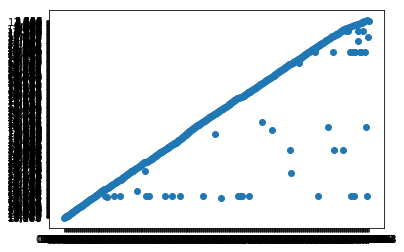

In [898]:
fig, ax = plt.subplots()
ax.scatter(df['Date'], df['Attendance'])
fig.show()

In [937]:
dft= df #pd.to_numeric(df['Attendance'])
dft['Attendance'] = dft['Attendance'].map(lambda x : (x.replace(',', '')))
dft['Attendance'] = pd.to_numeric(dft['Attendance'])
type(dft['Attendance'][442])

AttributeError: 'float' object has no attribute 'replace'

In [941]:
dft.head()

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia",15238.0
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil",10040.0
2,UFC Fight Night: Cejudo vs. Dillashaw,01/19/2019,"Brooklyn, New York, USA",12152.0
3,UFC 232: Jones vs. Gustafsson 2,12/29/2018,"Los Angeles, California, USA",15862.0
4,UFC Fight Night: Lee vs. Iaquinta,12/15/2018,"Milwaukee, Wisconsin, USA",9010.0


In [1031]:
df['Attendance'] = df['Attendance'].fillna(value = 0)
df.head()

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia",15238.0
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil",10040.0
2,UFC Fight Night: Cejudo vs. Dillashaw,01/19/2019,"Brooklyn, New York, USA",12152.0
3,UFC 232: Jones vs. Gustafsson 2,12/29/2018,"Los Angeles, California, USA",15862.0
4,UFC Fight Night: Lee vs. Iaquinta,12/15/2018,"Milwaukee, Wisconsin, USA",9010.0


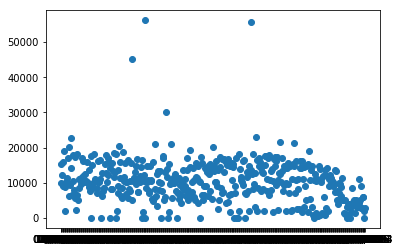

In [980]:
fig, ax = plt.subplots()
ax.scatter(df['Date'], df['Attendance'])
fig.show()

In [996]:
df_nz = df[df['Attendance'] > 0]

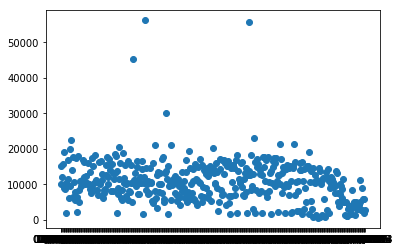

In [982]:
fig, ax = plt.subplots()
ax.scatter(df_nz['Date'], df_nz['Attendance'])
fig.show()

In [997]:
df.count() - df_nz.count()

Event Name    19
Date          19
Location      19
Attendance    19
dtype: int64

In [998]:
df_nz.count()

Event Name    447
Date          447
Location      447
Attendance    447
dtype: int64

In [995]:
df.count()

Event Name    466
Date          466
Location      466
Attendance    466
dtype: int64

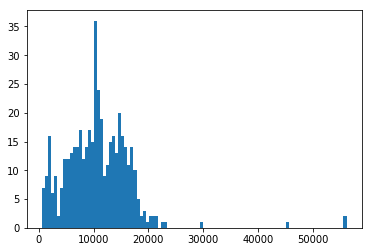

In [999]:
fig, ax = plt.subplots()
ax.hist(df_nz['Attendance'], bins = 100)
fig.show()

In [961]:
df_high = df_nz[df_nz['Attendance']> 25000]

In [962]:
df_high

,Event Name,Date,Location,Attendance
109,UFC 198: Werdum vs Miocic,05/14/2016,"Curitiba, Parana, Brazil",45207.0
128,UFC 193: Rousey vs Holm,11/14/2015,"Melbourne, Victoria, Australia",56214.0
160,UFC Fight Night: Gustafsson vs Johnson,01/24/2015,"Stockholm, Sweden",30000.0
292,UFC 129: St-Pierre vs Shields,04/30/2011,"Toronto, Ontario, Canada",55724.0


In [989]:
df_zero = df[df['Attendance']== 0]

In [990]:
df_zero

,Event Name,Date,Location,Attendance
46,The Ultimate Fighter 26 Finale,12/01/2017,"Las Vegas, Nevada, USA",0.0
61,UFC Fight Night: Nelson vs. Ponzinibbio,07/16/2017,"Glasgow, Scotland, United Kingdom",0.0
75,UFC 209: Woodley vs. Thompson 2,03/04/2017,"Las Vegas, Nevada, USA",0.0
84,UFC Fight Night: Lewis vs. Abdurakhimov,12/09/2016,"Albany, New York, USA",0.0
124,The Ultimate Fighter 22 Finale,12/11/2015,"Las Vegas, Nevada, USA",0.0
129,UFC Fight Night: Belfort vs Henderson,11/07/2015,"Sao Paulo, Sao Paulo, Brazil",0.0
153,UFC Fight Night: Mendes vs Lamas,04/04/2015,"Fairfax, Virginia, USA",0.0
163,UFC Fight Night: Machida vs Dollaway,12/20/2014,"Barueri, Sao Paulo, Brazil",0.0
177,UFC Fight Night: Souza vs Mousasi,09/05/2014,"Ledyard, Connecticut, USA",0.0
215,UFC Fight Night: Fight for the Troops,11/06/2013,"Fort Campbell, Kentucky, USA",0.0


In [1001]:
df.head()

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia",15238.0
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil",10040.0
2,UFC Fight Night: Cejudo vs. Dillashaw,01/19/2019,"Brooklyn, New York, USA",12152.0
3,UFC 232: Jones vs. Gustafsson 2,12/29/2018,"Los Angeles, California, USA",15862.0
4,UFC Fight Night: Lee vs. Iaquinta,12/15/2018,"Milwaukee, Wisconsin, USA",9010.0


In [1003]:
pwd!

'/home/victor/Documents/Galvanize/projects/DSI/week4/UFC_Analysis'

In [1020]:
df.to_csv('/home/victor/Documents/Galvanize/projects/DSI/week4/UFC_Analysis\events_info.csv')

In [1027]:
df2.to_csv('/home/victor/Documents/Galvanize/projects/DSI/week4/UFC_Analysis/events_fights.csv')

In [1029]:
df3.to_csv('/home/victor/Documents/Galvanize/projects/DSI/week4/UFC_Analysis/fighters_info.csv')

In [1030]:
df4.to_csv('/home/victor/Documents/Galvanize/projects/DSI/week4/UFC_Analysis/fighters_fights.csv')